# 3.1節

## 実践７

リスト 3.1

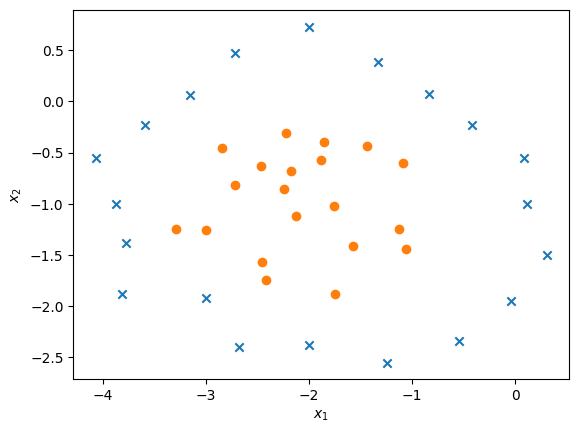

(Text(0.5, 24.4, '$x_1$'), Text(24.4, 0.5, '$x_2$'), None)

In [1]:
import matplotlib.pyplot as plt, numpy as np, math

np.random.seed(3)
N_minus = 20
r1 = np.sqrt(0.9*np.random.rand(N_minus)) 
t1 = 2*math.pi*np.random.rand(N_minus) 
x_minus_data = np.array([1.5*r1*np.cos(t1)-2, r1*np.sin(t1)-1]) 
N_plus = 20
r2 = np.sqrt(2*1.1*np.random.rand(N_plus)+1.1) 
t2 = np.arange(N_plus)*2*np.pi/N_plus
x_plus_data  = np.array([1.5*r2*np.cos(t2)-2, r2*np.sin(t2)-1]) 
x_data  = np.hstack((x_plus_data, x_minus_data))

lam_data = np.hstack((np.ones(N_plus), -np.ones(N_minus)))

fig, ax = plt.subplots()
ax.scatter(x_plus_data[0], x_plus_data[1], marker='x')
ax.scatter(x_minus_data[0], x_minus_data[1], marker='o')
plt.xlabel('$x_1$'), plt.ylabel('$x_2$'), plt.show()

リスト 3.2

In [2]:
def kernel_func(x1, x2, d):
    x1d = x2d = 0
    for m in range(d):
        x1d = np.hstack((x1d, x1**(m+1)))
        x2d = np.hstack((x2d, x2**(m+1)))
    return x1d @ x2d

def kernel_matrix(x1, x2, d):
    K = np.empty((len(x1), len(x2)))
    for i in range(len(x1)):
      for j in range(len(x2)):
        K[i,j] = kernel_func(x1[i], x2[j], d)
    return K

リスト 3.3

In [3]:
import cvxpy as cp

N = N_plus + N_minus
c = cp.Variable(N)
v0 = cp.Variable(1)
K = kernel_matrix(x_data.T, x_data.T, 2)
cons = [np.diag(lam_data)@(K @ c + v0*np.ones(N)) >= np.ones(N)]
Kcost = cp.Parameter(shape=K.shape, value=K, PSD=True)
obj = cp.Minimize(cp.quad_form(c, Kcost))
P = cp.Problem(obj, cons)
P.solve(verbose=False)

c = c.value
v0 = v0.value
cons = np.diag(lam_data) @ (K @ c + v0*np.ones(N)) - 1
sv_index = (np.where(np.abs(cons) < 1e-7))[0].tolist()
sv = x_data[:,sv_index] 

/usr/local/lib/python3.9/dist-packages/cvxpy/reductions/solvers/solving_chain.py:200: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)


リスト 3.4

6.233872785199777
6.3531987499031874
1.6051077799960616
3.4736508491069236


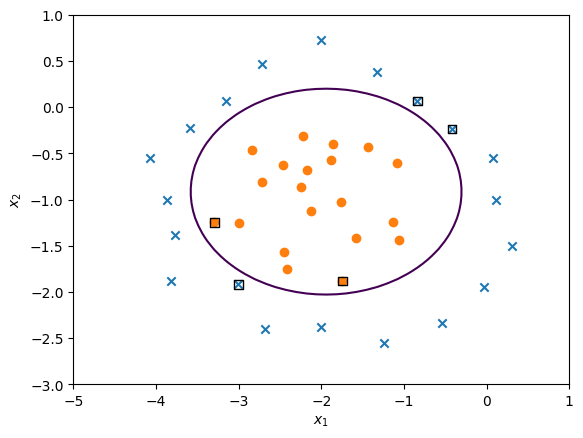

(Text(0.5, 24.4, '$x_1$'), Text(24.4, 0.5, '$x_2$'), None)

In [4]:
x1 = np.linspace(-5, 1, 50)
x2 = np.linspace(-3, 1, 50)
X1, X2 = np.meshgrid(x1, x2)
X = np.c_[np.ravel(X1), np.ravel(X2)]

kx = kernel_matrix(X, x_data.T, 2)
f = kx @ c + v0

v1 = 0
v2 = 0
v3 = 0
v4 = 0
for i in range(N):
  v1 += c[i]*x_data[0,i]
  v2 += c[i]*x_data[1,i]
  v3 += c[i]*x_data[0,i]**2
  v4 += c[i]*x_data[1,i]**2

print(v1)
print(v2)
print(v3)
print(v4)

fig, ax = plt.subplots()
ax.scatter(x_plus_data[0], x_plus_data[1], marker='x')
ax.scatter(x_minus_data[0], x_minus_data[1], marker='o')
ax.scatter(sv[0], sv[1], marker='s', color='k', fc='none')
plt.contour(X1, X2, f.reshape(X1.shape), [0])
plt.xlabel('$x_1$'), plt.ylabel('$x_2$'), plt.show()

# 3.2節

In [5]:
import cvxpy as cp

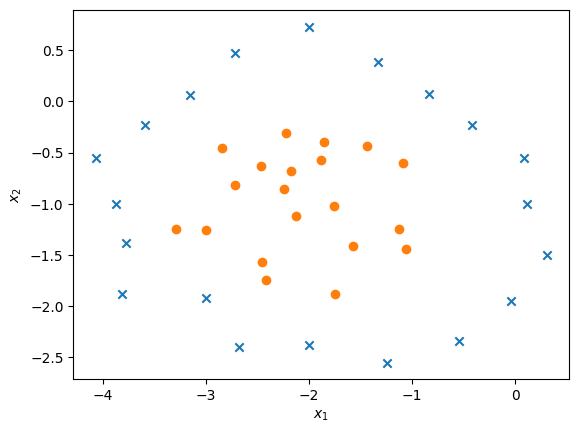

(Text(0.5, 24.4, '$x_1$'), Text(24.4, 0.5, '$x_2$'), None)

In [6]:
import matplotlib.pyplot as plt, numpy as np, math

np.random.seed(3)
N_minus = 20
r1 = np.sqrt(0.9*np.random.rand(N_minus)) 
t1 = 2*math.pi*np.random.rand(N_minus) 
x_minus_data = np.array([1.5*r1*np.cos(t1)-2, r1*np.sin(t1)-1]) 
N_plus = 20
r2 = np.sqrt(2*1.1*np.random.rand(N_plus)+1.1) 
t2 = np.arange(N_plus)*2*np.pi/N_plus
x_plus_data  = np.array([1.5*r2*np.cos(t2)-2, r2*np.sin(t2)-1]) 
x_data  = np.hstack((x_plus_data, x_minus_data))

lam_data = np.hstack((np.ones(N_minus), -np.ones(N_plus)))

fig, ax = plt.subplots()
ax.scatter(x_plus_data[0], x_plus_data[1], marker='x')
ax.scatter(x_minus_data[0], x_minus_data[1], marker='o')
plt.xlabel('$x_1$'), plt.ylabel('$x_2$'), plt.show()

In [7]:
def kernel_func(x1, x2, d):
    x1d = x2d = 1
    for m in range(d):
        x1d = np.hstack((x1d, x1**(m+1)))
        x2d = np.hstack((x2d, x2**(m+1)))
    return x1d @ x2d

def kernel_matrix(x1, x2, d):
    K = np.empty((len(x1), len(x2)))
    for i in range(len(x1)):
      for j in range(len(x2)):
        K[i,j] = kernel_func(x1[i], x2[j], d)
    return K

リスト 3.5

In [8]:
x_minus_data = np.concatenate([x_minus_data, np.array([[-0.3],[-0.8]])], 1)
x_plus_data = np.concatenate([x_plus_data, np.array([[-0.8],[-1.5]])], 1)
x_data  = np.hstack((x_plus_data, x_minus_data))
N_plus += 1
N_minus += 1

lam_data = np.hstack((np.ones(N_plus), -np.ones(N_minus)))

リスト 3.6

In [9]:
N = N_plus + N_minus
c = cp.Variable(N) 
v0 = cp.Variable(1)
zeta = cp.Variable(N) 
beta = 10
K = kernel_matrix(x_data.T, x_data.T, 2)
cons = [np.diag(lam_data) @ (K @ c + v0*np.ones(N)) >= np.ones(N) - zeta, zeta >= np.zeros(N)]
Kcost = cp.Parameter(shape=K.shape, value=K, PSD=True)
obj = cp.Minimize(cp.quad_form(c, Kcost) + beta*cp.sum(zeta))
P = cp.Problem(obj, cons)
P.solve(verbose=False)

72.24945559706663

リスト 3.7

In [10]:
c = c.value
v0 = v0.value
cons = np.diag(lam_data) @ (K @ c + v0*np.ones(N)) - 1
sv_index = (np.where(np.abs(cons) < 1e-7))[0].tolist()
sv_index += (np.where(zeta.value > 1e-5))[0].tolist()
sv = x_data[:,sv_index] 

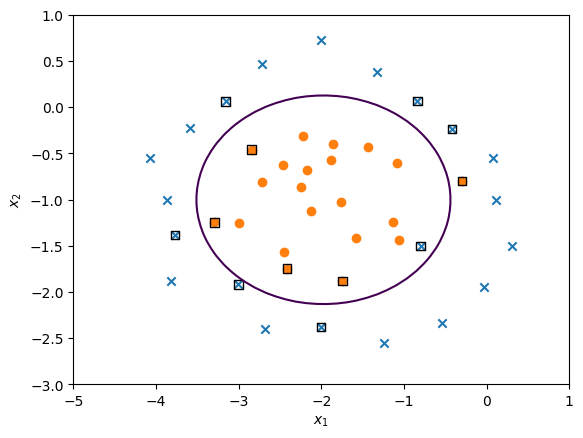

(Text(0.5, 24.4, '$x_1$'), Text(24.4, 0.5, '$x_2$'), None)

In [11]:
x1 = np.linspace(-5, 1, 50)
x2 = np.linspace(-3, 1, 50)
X1, X2 = np.meshgrid(x1, x2)
X = np.c_[np.ravel(X1), np.ravel(X2)]

kx = kernel_matrix(X, x_data.T, 2)
f = kx @ c + v0

fig, ax = plt.subplots()
ax.scatter(x_plus_data[0], x_plus_data[1], marker='x')
ax.scatter(x_minus_data[0], x_minus_data[1], marker='o')
ax.scatter(sv[0], sv[1], marker='s', color='k', fc='none')
plt.contour(X1, X2, f.reshape(X1.shape), [0])
plt.xlabel('$x_1$'), plt.ylabel('$x_2$'), plt.show()

# 3.3節

## 実践８

In [12]:
import cvxpy as cp

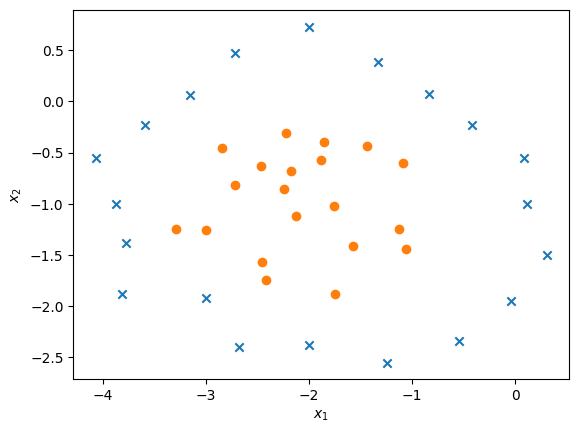

(Text(0.5, 24.4, '$x_1$'), Text(24.4, 0.5, '$x_2$'), None)

In [13]:
import matplotlib.pyplot as plt, numpy as np, math

np.random.seed(3)
N_minus = 20
r1 = np.sqrt(0.9*np.random.rand(N_minus)) 
t1 = 2*math.pi*np.random.rand(N_minus) 
x_minus_data = np.array([1.5*r1*np.cos(t1)-2, r1*np.sin(t1)-1]) 
N_plus = 20
r2 = np.sqrt(2*1.1*np.random.rand(N_plus)+1.1) 
t2 = np.arange(N_plus)*2*np.pi/N_plus
x_plus_data  = np.array([1.5*r2*np.cos(t2)-2, r2*np.sin(t2)-1]) 
x_data  = np.hstack((x_plus_data, x_minus_data))

lam_data = np.hstack((np.ones(N_minus), -np.ones(N_plus)))

fig, ax = plt.subplots()
ax.scatter(x_plus_data[0], x_plus_data[1], marker='x')
ax.scatter(x_minus_data[0], x_minus_data[1], marker='o')
plt.xlabel('$x_1$'), plt.ylabel('$x_2$'), plt.show()

In [14]:
def kernel_func(x1, x2): 
    gamma = 1/2
    k = math.exp(-gamma*np.sum((x1-x2)**2))
    return k

def kernel_matrix(x1, x2):
    K = np.empty((len(x1), len(x2)))
    for i in range(len(x1)):
      for j in range(len(x2)):
        K[i,j] = kernel_func(x1[i], x2[j])
    return K

In [15]:
x_minus_data = np.concatenate([x_minus_data, np.array([[-0.3],[-0.8]])], 1)
x_plus_data = np.concatenate([x_plus_data, np.array([[-0.8],[-1.5]])], 1)
x_data  = np.hstack((x_plus_data, x_minus_data))
N_plus += 1
N_minus += 1

lam_data = np.hstack((np.ones(N_plus), -np.ones(N_minus)))

In [16]:
N = N_plus + N_minus
c = cp.Variable(N) 
v0 = cp.Variable(1)
zeta = cp.Variable(N) 
beta = 10
K = kernel_matrix(x_data.T, x_data.T)
cons = [np.diag(lam_data) @ (K @ c + v0*np.ones(N)) >= np.ones(N) - zeta, zeta >= np.zeros(N)]
Kcost = cp.Parameter(shape=K.shape, value=K, PSD=True)
obj = cp.Minimize(cp.quad_form(c, Kcost) + beta*cp.sum(zeta))
P = cp.Problem(obj, cons)
P.solve(verbose=False)

65.84907987601099

In [17]:
import cvxpy as cp

N = N_plus + N_minus
c = cp.Variable(N)
v0 = cp.Variable(1)
K = kernel_matrix(x_data.T, x_data.T)
cons = [np.diag(lam_data)@(K @ c + v0*np.ones(N)) >= np.ones(N)]
Kcost = cp.Parameter(shape=K.shape, value=K, PSD=True)
obj = cp.Minimize(cp.quad_form(c, Kcost))
P = cp.Problem(obj, cons)
P.solve(verbose=False)

c = c.value
v0 = v0.value
cons = np.diag(lam_data) @ (K @ c + v0*np.ones(N)) - 1
sv_index = (np.where(np.abs(cons) < 1e-7))[0].tolist()
sv = x_data[:,sv_index] 

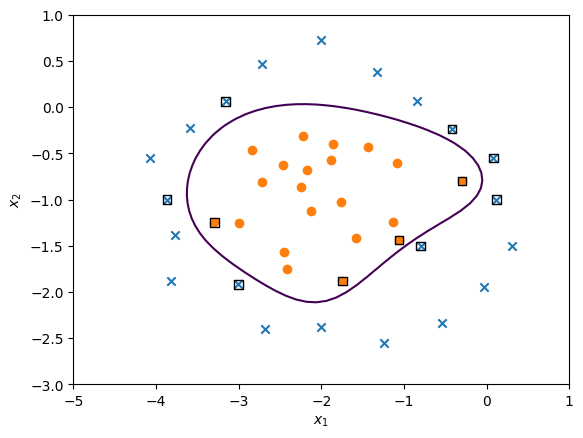

(Text(0.5, 24.4, '$x_1$'), Text(24.4, 0.5, '$x_2$'), None)

In [18]:
x1 = np.linspace(-5, 1, 50)
x2 = np.linspace(-3, 1, 50)
X1, X2 = np.meshgrid(x1, x2)
X = np.c_[np.ravel(X1), np.ravel(X2)]

kx = kernel_matrix(X, x_data.T)
f = kx @ c + v0

fig, ax = plt.subplots()
ax.scatter(x_plus_data[0], x_plus_data[1], marker='x')
ax.scatter(x_minus_data[0], x_minus_data[1], marker='o')
ax.scatter(sv[0], sv[1], marker='s', color='k', fc='none')
plt.contour(X1, X2, f.reshape(X1.shape), [0])
plt.xlabel('$x_1$'), plt.ylabel('$x_2$'), plt.show()